# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [37]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [38]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])


,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

pie charts are ineffective because people struggle to accurately compare angles and areas, making small differences difficult to detect and important insights easy to miss. They also do not work well for comparisons across time or between groups and often rely on legends or labels that increase cognitive load. As more slices are added, pie charts quickly become cluttered, reducing clarity and weakening their ability to communicate a clear data story.

In this case, there is no visual cue in the pie chart to indicate progression from negative to neutral to positive sentiment, causing the chart to fail at explaining the underlying narrative of the data. The pie chart title is generic and lacks insight.A more informative title such as “Customer Engagement Is Largely Moderate to High” would immediately highlight the key takeaway. The pie chart displays percentage slices causing visual clutter ,also the categories are explained separately in a legend, increasing cognitive load on  the audience to map colors to meanings. 

I would go for a bar chart that improves clarity by using an insight-driven title and placing categories directly on the axis, This will eliminate the need   for a legend as well. Ordering the bars from negative to positive visually reinforces the sentiment progression and underlying story. Bar lengths make comparisons easier than pie slices, more so  for smaller differences. Clear precise labels avoids visual clutter as well. Also, a simple same color scheme should be enough for the audience to visualize the differences

a sample generated bar chart is attached

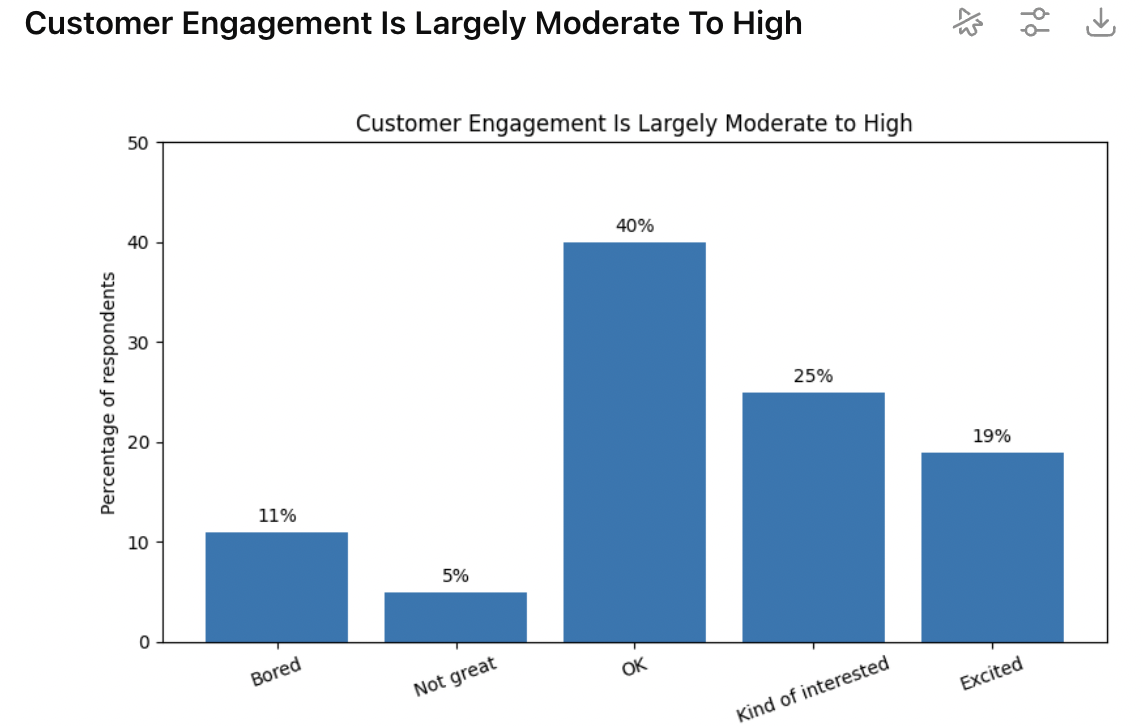

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [39]:
num_customers = 100
np.random.seed(0)

In [40]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [41]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [42]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [43]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [44]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [45]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [46]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [47]:
df_bank.loc[2, "AccountID"] = np.nan

In [48]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

In [49]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)


In [50]:
df_bank_loaded = pd.read_csv("bank_customers.csv")
df_bank_loaded

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
...,...,...,...,...,...,...
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking
96,96.0,1989-03-09,870-80-0364,0.0,2054-11-01,cd
97,97.0,1960-09-23,773-33-2797,75.0,1993-09-16,cd
98,98.0,1975-08-17,846-64-7054,34.0,2032-12-25,savings


1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [51]:
# The first few rows
df_bank_loaded.info()

df_bank_loaded.describe()

df_bank_loaded.iloc[0:5]


<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     99 non-null     float64
 1   BirthDate      99 non-null     str    
 2   SSN            99 non-null     str    
 3   AccountID      98 non-null     float64
 4   AccountOpened  99 non-null     str    
 5   AccountType    99 non-null     str    
dtypes: float64(2), str(4)
memory usage: 4.8 KB


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [52]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d". You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [53]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [54]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [55]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [56]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [57]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [58]:
df_bank_datefix.info()

<class 'pandas.DataFrame'>
RangeIndex: 97 entries, 2 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     97 non-null     float64       
 1   BirthDate      97 non-null     datetime64[us]
 2   SSN            97 non-null     str           
 3   AccountID      96 non-null     float64       
 4   AccountOpened  97 non-null     datetime64[us]
 5   AccountType    97 non-null     str           
dtypes: datetime64[us](2), float64(2), str(2)
memory usage: 4.7 KB


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [59]:
#check if there are null values in the data if so convert it into zero

df_bank_datefix.loc[:, df_bank_datefix.isna().any()]

cols_with_nan = df_bank_datefix.columns[df_bank_datefix.isna().any()]

df_bank_datefix.loc[:, cols_with_nan] = (
    df_bank_datefix.loc[:, cols_with_nan].fillna(0)
)

#Now there are no more Nulls all null values are replaced with zero
df_bank_datefix.loc[:, df_bank_datefix.isna().any()]

""
2
3
4
5
6
...
94
95
96
97


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [60]:
#drop all duplicates

df_bank_datefix.duplicated().any()

# check if account id is unique.Its not.so keep the first record only if there are dups
df_bank_datefix["AccountID"].is_unique

#keep the first record 
dup_id = df_bank_datefix.loc[
    df_bank_datefix["AccountID"].duplicated(keep="first"),
    "AccountID"
].iloc[0]

df_bank_datefix[df_bank_datefix["AccountID"] == dup_id]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
23,23.0,2021-12-11,939-09-9746,56.0,2071-09-01,cd


5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [61]:
if not df_bank_datefix["AccountID"].is_unique:
    first_non_unique = (
        df_bank_datefix.loc[
            df_bank_datefix["AccountID"].duplicated(keep="first"),
            "AccountID"
        ].iloc[0]
    )
df_bank_datefix[df_bank_datefix["AccountID"] == first_non_unique]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
23,23.0,2021-12-11,939-09-9746,56.0,2071-09-01,cd


6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [62]:
n = len(pd.unique(df_bank_datefix['AccountID']))
print("Number of unique AccountIDs:", n)
df_bank_datefix["AccountID"].is_unique

Number of unique AccountIDs: 63


False

7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [63]:
df_bank_datefix = df_bank_datefix.drop_duplicates(
    subset="AccountID",
    keep="first"
)

df_bank_datefix["AccountID"].is_unique

print( df_bank_datefix)



    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType
2          2.0 1976-12-15  377-98-9839        0.0    2019-03-25    checking
3          3.0 2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0 1985-12-06  750-55-5509       77.0    2059-05-05          cd
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking
6          6.0 1975-04-05  288-62-9296       56.0    2048-09-21     savings
..         ...        ...          ...        ...           ...         ...
83        83.0 1976-10-12  875-04-4958       45.0    2039-09-15          cd
88        88.0 1962-02-07  327-09-3267       97.0    1989-10-03          cd
90        90.0 1969-06-18  395-31-7064       34.0    2010-12-28    checking
94        94.0 1969-03-14  958-12-8308        5.0    2037-04-03     savings
95        95.0 1975-09-23  607-97-1651       36.0    2011-07-24    checking

[63 rows x 6 columns]


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

In [64]:
import numpy as np
import pandas as pd

# Ensure BirthDate is datetime
df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"])

# Calculate age in years (rounded down)
today = pd.Timestamp.today().normalize()
df_bank_datefix["Age"] = (
    (today - df_bank_datefix["BirthDate"]).dt.days // 365
)

mean_age = df_bank_datefix["Age"].mean()
median_age = df_bank_datefix["Age"].median()
mode_age = df_bank_datefix["Age"].mode()[0]   # take first mode if multiple

print( 'Mean Age:',mean_age)
print( 'Median Age:',median_age)
print( 'Mode Age:',mode_age)

Mean Age: 38.0
Median Age: 35.0
Mode Age: 29


Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [65]:
# convert AccountType to Integer
one_hot = pd.get_dummies(df_bank_datefix["AccountType"], prefix ="AccountType", dtype=int)
df2 = df_bank_datefix.join(one_hot)
df2.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,AccountType_cd,AccountType_checking,AccountType_savings
2,2.0,1976-12-15,377-98-9839,0.0,2019-03-25,checking,49,0,1,0
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,22,1,0,0
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,40,1,0,0
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,0,1,0
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,50,0,0,1


Now, change the cd, checking, and savings columns into integers.

In [66]:
df2.iloc[0:5]

df2.to_csv("df2_cleaned.csv", index=False)

#outlier analysis

outliers = df_bank_datefix[
    (df_bank_datefix["Age"] < 1) |
    (df_bank_datefix["Age"] > 100)
]
print(outliers)

Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType, Age]
Index: []


10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

In [67]:
import pandas as pd
import numpy as np

# --- Ensure date columns are datetime (safe even if already datetime) ---
df2["BirthDate"] = pd.to_datetime(df2["BirthDate"], errors="coerce")
df2["AccountOpened"] = pd.to_datetime(df2["AccountOpened"], errors="coerce")

today = pd.Timestamp.today().normalize()
cutoff_120yrs = today - pd.Timedelta(days=120 * 365)

# ---------------- AccountID checks ----------------
mask_missing_id = df2["AccountID"].isna()
if df2.loc[mask_missing_id, ["AccountID"]].empty:
    print("No anomalies found for AccountID.")
else:
    print("Anomalies found for AccountID (missing):")
    print(df2.loc[mask_missing_id, ["AccountID"]])

mask_dup_id = df2["AccountID"].duplicated(keep=False) & df2["AccountID"].notna()
if df2.loc[mask_dup_id, ["AccountID"]].empty:
    print("No anomalies found for duplicate AccountIDs.")
else:
    print("Anomalies found for duplicate AccountIDs:")
    print(df2.loc[mask_dup_id, ["AccountID"]].sort_values("AccountID"))

# ---------------- BirthDate checks ----------------
mask_birth_too_old = df2["BirthDate"].notna() & (df2["BirthDate"] < cutoff_120yrs)
if df2.loc[mask_birth_too_old, ["BirthDate"]].empty:
    print("No anomalies found for BirthDates older than 120 years.")
else:
    print("Anomalies found for BirthDates older than 120 years:")
    print(df2.loc[mask_birth_too_old, ["BirthDate"]])

mask_birth_future = df2["BirthDate"].notna() & (df2["BirthDate"] > today)
if df2.loc[mask_birth_future, ["BirthDate"]].empty:
    print("No anomalies found for BirthDates after today.")
else:
    print("Anomalies found for BirthDates after today:")
    print(df2.loc[mask_birth_future, ["BirthDate"]])
    
    
    # ---------------- Age checks (if Age exists) ----------------
if "Age" in df2.columns:
    mask_age_bad = df2["Age"].notna() & ((df2["Age"] < 0) | (df2["Age"] > 120))
    if df2.loc[mask_age_bad, ["BirthDate", "Age"]].empty:
        print("No anomalies found for Age.")
    else:
        print("Anomalies found for Age:")
        print(df2.loc[mask_age_bad, ["BirthDate", "Age"]])
else:
    print("Skipping Age check: column 'Age' not found.")

# ---------------- AccountType checks ----------------
# Normalize values: strip spaces + lowercase; keep NaNs as NaNs
acct_norm = df2["AccountType"].astype("string").str.strip().str.lower()

mask_type_missing = df2["AccountType"].isna()
mask_type_invalid = df2["AccountType"].notna() & ~acct_norm.isin(["checking", "savings", "cd"])

if df2.loc[mask_type_missing | mask_type_invalid, ["AccountType"]].empty:
    print("No anomalies found for AccountType.")
else:
    print("Anomalies found for AccountType (missing or invalid):")
    print(df2.loc[mask_type_missing | mask_type_invalid, ["AccountType"]])

# ---------------- One-hot checks ----------------
onehot_cols = df2.filter(like="AccountType_").columns

if len(onehot_cols) == 0:
    print("Skipping one-hot check: no columns matching 'AccountType_' found.")
else:
    mask_onehot_bad = ~df2[onehot_cols].isin([0, 1]).all(axis=1)
    if df2.loc[mask_onehot_bad, onehot_cols].empty:
        print("No anomalies found for one-hot encoded columns.")
    else:
        print("Anomalies found for one-hot encoded columns (values not 0/1):")
        print(df2.loc[mask_onehot_bad, onehot_cols])

    # Optional: each row should sum to exactly 1 if exactly one type per customer
    mask_onehot_sum_bad = df2[onehot_cols].sum(axis=1) != 1
    if df2.loc[mask_onehot_sum_bad, onehot_cols].empty:
        print("No anomalies found for one-hot sums (each row sums to 1).")
    else:
        print("Anomalies found for one-hot sums (row sum != 1):")
        print(df2.loc[mask_onehot_sum_bad, onehot_cols])


# ---------------- AccountOpened checks ----------------
mask_open_future = df2["AccountOpened"].notna() & (df2["AccountOpened"] > today)
if df2.loc[mask_open_future, ["AccountOpened"]].empty:
    print("No anomalies found for AccountOpened dates after today.")
else:
    print("Anomalies found for AccountOpened dates after today:")
    print(df2.loc[mask_open_future, ["AccountOpened"]])

mask_open_before_birth = (
    df2["AccountOpened"].notna() & df2["BirthDate"].notna() &
    (df2["AccountOpened"] < df2["BirthDate"])
)
if df2.loc[mask_open_before_birth, ["BirthDate", "AccountOpened"]].empty:
    print("No anomalies found for AccountOpened dates before BirthDate.")
else:
    print("Anomalies found for AccountOpened dates before BirthDate:")
    print(df2.loc[mask_open_before_birth, ["BirthDate", "AccountOpened"]])


# ---------------- Under-18 account opening check (needs TWO columns) ----------------
age_at_open = (df2["AccountOpened"] - df2["BirthDate"]).dt.days / 365.25
mask_under_18 = df2["AccountOpened"].notna() & df2["BirthDate"].notna() & (age_at_open < 18)

print(f"Number of customers who opened accounts before 18: {mask_under_18.sum()}")
print(df2.loc[mask_under_18, ["BirthDate", "AccountOpened"]])


No anomalies found for AccountID.
No anomalies found for duplicate AccountIDs.
No anomalies found for BirthDates older than 120 years.


No anomalies found for BirthDates after today.
No anomalies found for Age.
No anomalies found for AccountType.
No anomalies found for one-hot encoded columns.
No anomalies found for one-hot sums (each row sums to 1).
Anomalies found for AccountOpened dates after today:
   AccountOpened
4     2059-05-05
6     2048-09-21
7     2087-07-24
8     2046-11-17
9     2048-06-01
11    2036-03-17
15    2031-01-21
16    2047-01-25
17    2063-08-28
18    2070-08-26
21    2077-03-09
26    2028-07-28
31    2033-06-08
32    2070-03-26
35    2031-10-28
36    2028-11-27
37    2094-12-17
41    2073-11-13
42    2036-04-28
43    2068-07-28
48    2027-02-27
52    2032-09-02
54    2066-06-21
55    2061-02-23
57    2049-12-28
59    2065-03-29
60    2033-02-18
61    2068-01-17
62    2090-07-02
63    2077-12-30
69    2068-04-18
77    2067-05-03
83    2039-09-15
94    2037-04-03
No anomalies found for AccountOpened dates before BirthDate.
Number of customers who opened accounts before 18: 12
    BirthDate Accoun

11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

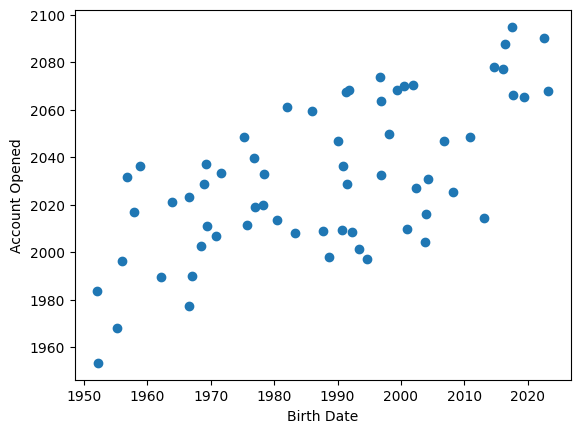

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# load preprocessed df2 if kernel was restarted / df2 not in memory
if 'df2' not in globals():
    try:
        df2 = pd.read_csv("df2_cleaned.csv", parse_dates=["BirthDate", "AccountOpened"])
    except FileNotFoundError:
        raise FileNotFoundError("df2 is not defined and df2_cleaned.csv was not found. Run the preprocessing cells first.")

ax = plt.gca()  # get an "Axes" object to draw on
ax.scatter(df2["BirthDate"], df2["AccountOpened"])  # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened")  # label the y axis
ax.set_xlabel("Birth Date")  # label the x axis
plt.show()

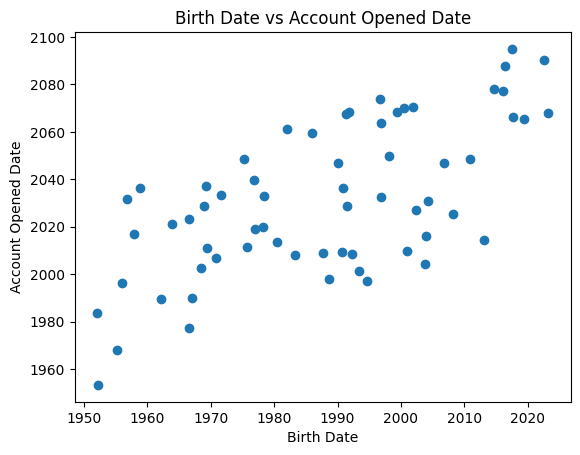

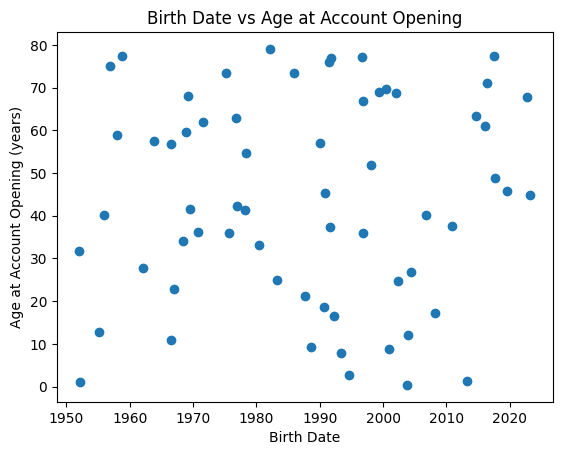

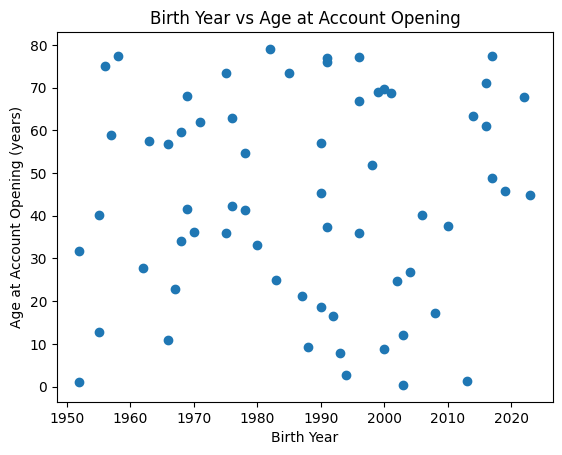

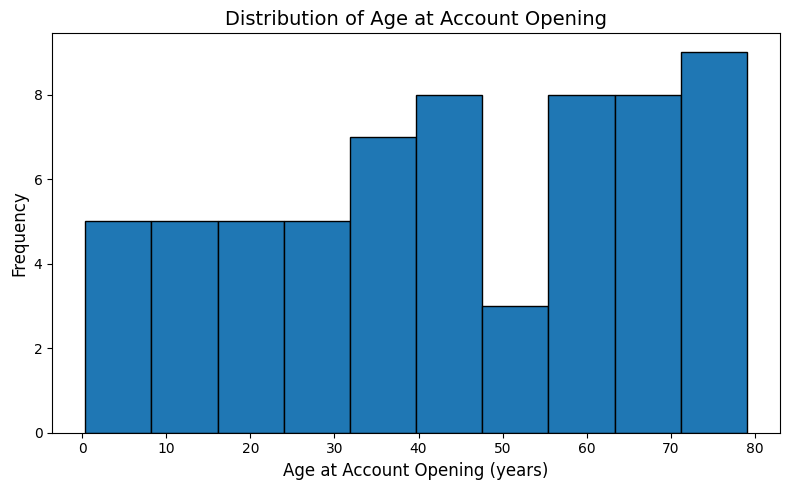

In [69]:
# 0) Make sure the date columns are real datetimes
df2["BirthDate"] = pd.to_datetime(df2["BirthDate"], errors="coerce")
df2["AccountOpened"] = pd.to_datetime(df2["AccountOpened"], errors="coerce")

# Create helper columns used in plots 2–4
df2["AgeAtAccountOpen"] = (df2["AccountOpened"] - df2["BirthDate"]).dt.days / 365.25
df2["BirthYear"] = df2["BirthDate"].dt.year

ax = plt.gca()
ax.scatter(df2["BirthDate"], df2["AccountOpened"])
ax.set_xlabel("Birth Date")
ax.set_ylabel("Account Opened Date")
ax.set_title("Birth Date vs Account Opened Date")
plt.show()

ax = plt.gca()
ax.scatter(df2["BirthDate"], df2["AgeAtAccountOpen"])
ax.set_xlabel("Birth Date")
ax.set_ylabel("Age at Account Opening (years)")
ax.set_title("Birth Date vs Age at Account Opening")
plt.show()

ax = plt.gca()
ax.scatter(df2["BirthYear"], df2["AgeAtAccountOpen"])
ax.set_xlabel("Birth Year")
ax.set_ylabel("Age at Account Opening (years)")
ax.set_title("Birth Year vs Age at Account Opening")
plt.show()

plt.figure(figsize=(8,5))  # make it wider and clearer

ax = plt.gca()

ax.hist(
    df2["AgeAtAccountOpen"].dropna(),
    bins=10,
    edgecolor='black'   # makes bars visually distinct
)

ax.set_xlabel("Age at Account Opening (years)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Distribution of Age at Account Opening", fontsize=14)

plt.tight_layout()   # prevents label cut-off
plt.show()


# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

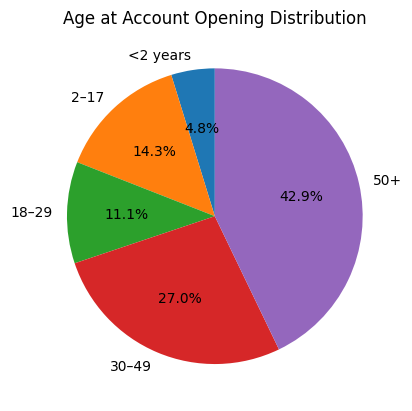

In [70]:

import pandas as pd
import matplotlib.pyplot as plt

df2["BirthDate"] = pd.to_datetime(df2["BirthDate"], errors="coerce")
df2["AccountOpened"] = pd.to_datetime(df2["AccountOpened"], errors="coerce")

df2["AgeAtAccountOpen"] = (df2["AccountOpened"] - df2["BirthDate"]).dt.days / 365.25

bins = [0, 2, 18, 30, 50, 100]
labels = ["<2 years", "2–17", "18–29", "30–49", "50+"]

df2["AgeGroup"] = pd.cut(df2["AgeAtAccountOpen"], bins=bins, labels=labels, right=False)

age_counts = df2["AgeGroup"].value_counts().sort_index()

plt.figure()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Age at Account Opening Distribution")
plt.show()


